1.1- Importando datos

In [7]:
import pandas as pd

In [8]:
datos = pd.read_csv('Customer.csv')

In [9]:
datos.shape

(7043, 18)

In [10]:
datos.head()

,Mayor60Años,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVCable,Streaming,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,UnAño,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,UnAño,No,DebitoEnCuenta,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si


1.2 - Analizado lasvariables

In [11]:
#Modificación de forma manual
diccionario = {"Si" : 1,
               "No" : 0}

datosmodificados = datos[ ["Conyuge", "Dependientes", "TelefonoFijo", "PagoOnline", "Churn"] ].replace(diccionario)
datosmodificados.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [12]:
#transformacion con get_dummies
dummie_datos = pd.get_dummies(datos.drop([ "Conyuge", "Dependientes", "TelefonoFijo", "PagoOnline", "Churn"],
                                  axis=1))

#Union de los datos transformados con los que ya teniamos
datos_final = pd.concat([datosmodificados, dummie_datos], axis=1)

In [13]:
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,...,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,False,False,...,True,False,False,False,True,False,True,False,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,True,False,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,True,False,False
3,0,0,0,0,0,0,45,42.30,False,False,...,True,False,False,False,False,True,False,False,True,False
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,True,False,False,False


In [14]:
datos_final.shape

(7043, 39)

1.3-Definicion formal

Informaciones para la clasificacion:




*   x =inputs(datos de entrada)
*   y = outputs(datos de salida)


      




     

In [15]:
#Tip
pd.set_option("display.max_columns", 39)

In [16]:
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVCable_No,TVCable_Si,TVCable_SinServicioDeInternet,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
3,0,0,0,0,0,0,45,42.30,False,False,True,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False


yi = f(xi)

In [17]:
Xmaria = [[0,0,1,1,0,0,39.90,True, False, False,False,True,False,True,False,False,False,False,True,True,True,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,True]]

In [18]:
type(Xmaria)

list

In [19]:
#ymaria = ?

1.4-Balanceamiento de los datos

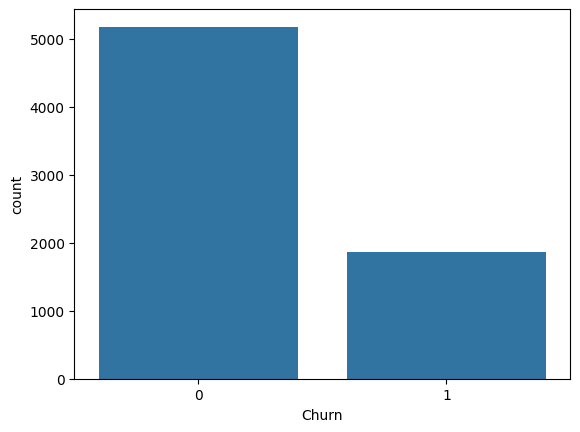

In [20]:
#variable target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x="Churn", data=datos_final)

In [21]:
datos_final.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [22]:
#biblioteca para balancear los datos utilizados over_sampling
from imblearn.over_sampling import SMOTE

In [23]:
#dividiendo los datos en características y target
x = datos_final.drop("Churn", axis=1)
y = datos_final["Churn"]

In [24]:
smt = SMOTE(random_state=42)
x_smt, y_smt = smt.fit_resample(x, y)

In [25]:
#unión de los datos balanceados
datos_final = pd.concat([x_smt, y_smt], axis=1)

In [26]:
#verificación 1 - unión de los datos
datos_final.head(2)

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVCable_No,TVCable_Si,TVCable_SinServicioDeInternet,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito,Churn
0,1,0,0,1,0,1,29.85,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,0


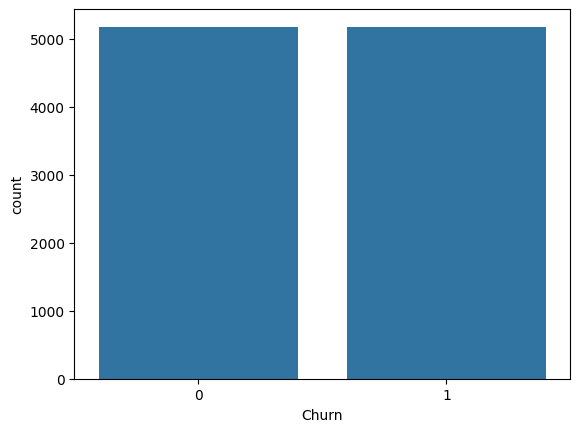

In [27]:
#verificacion 2 - balanceamiento
ax = sns.countplot(x="Churn", data=datos_final)

In [28]:
datos_final.Churn.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

2.1- Modelo K-nearest neighbors (KNN)

In [29]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  True,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  True,
  False,
  False,
  False,
  True]]

In [30]:
#ymaria = ?

In [31]:
#División en inputs y outputs
x = datos_final.drop("Churn", axis=1)
y = datos_final["Churn"]

In [32]:
#biblioteca para padronizar los datos
from sklearn.preprocessing import StandardScaler

In [33]:
norm = StandardScaler()
x_normalizado = norm.fit_transform(x)
x_normalizado

array([[ 1.26465288, -0.53189843, -3.04231798, ..., -0.54384519,
        -0.53414059, -0.51030788],
       [-0.79073082, -0.53189843,  0.32869674, ...,  1.83875855,
        -0.53414059, -0.51030788],
       [-0.79073082, -0.53189843,  0.32869674, ...,  1.83875855,
        -0.53414059, -0.51030788],
       ...,
       [-0.79073082, -0.53189843,  0.32869674, ..., -0.54384519,
        -0.53414059, -0.51030788],
       [-0.79073082, -0.53189843,  0.32869674, ...,  1.83875855,
        -0.53414059, -0.51030788],
       [-0.79073082, -0.53189843,  0.32869674, ...,  1.83875855,
        -0.53414059, -0.51030788]])

In [34]:
x_normalizado[ 0 ]

array([ 1.26465288, -0.53189843, -3.04231798,  0.80272458, -0.40965109,
       -1.11472686, -1.32844822, -0.99038254, -0.9317764 ,  3.04231798,
        1.4878389 , -1.06409084, -0.4450856 ,  0.77899441, -0.60086745,
       -0.4450856 , -1.10329969,  1.34552187, -0.4450856 ,  0.91382555,
       -0.74351942, -0.4450856 ,  0.78605736, -0.60191025, -0.4450856 ,
        1.10200875, -0.86076432, -0.4450856 ,  1.09750463, -0.8605942 ,
       -0.4450856 , -0.45996492,  0.69051351, -0.47470037,  1.0603819 ,
       -0.54384519, -0.53414059, -0.51030788])

In [35]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns=x.columns))
Xmaria_normalizado

array([[-0.79073082, -0.53189843,  0.32869674,  0.80272458, -0.40965109,
        -1.15641607, -0.97911955,  1.00971085, -0.9317764 , -0.32869674,
        -0.67211578,  0.93976939, -0.4450856 ,  0.77899441, -0.60086745,
        -0.4450856 , -1.10329969, -0.74320605,  2.24675882,  0.91382555,
         1.34495478, -0.4450856 , -1.27217179,  1.66137727, -0.4450856 ,
         1.10200875, -0.86076432, -0.4450856 , -0.91115789, -0.8605942 ,
         2.24675882, -0.45996492, -1.44819759,  2.10659201, -0.94305646,
        -0.54384519, -0.53414059,  1.95960134]])

In [36]:
import numpy as np

In [37]:
a = Xmaria_normalizado

In [38]:
b = x_normalizado[0]

In [39]:
#1 - comenzamos restando
a - b

array([[-2.05538369,  0.        ,  3.37101472,  0.        ,  0.        ,
        -0.0416892 ,  0.34932867,  2.00009339,  0.        , -3.37101472,
        -2.15995468,  2.00386023,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -2.08872793,  2.69184442,  0.        ,
         2.0884742 ,  0.        , -2.05822915,  2.26328751,  0.        ,
         0.        ,  0.        ,  0.        , -2.00866252,  0.        ,
         2.69184442,  0.        , -2.1387111 ,  2.58129238, -2.00343836,
         0.        ,  0.        ,  2.46990922]])

In [40]:
#2 - despues realizamos la exponenciacion
np.square(a - b)

array([[4.22460212e+00, 0.00000000e+00, 1.13637403e+01, 0.00000000e+00,
        0.00000000e+00, 1.73798952e-03, 1.22030518e-01, 4.00037358e+00,
        0.00000000e+00, 1.13637403e+01, 4.66540421e+00, 4.01545582e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.36278435e+00, 7.24602638e+00, 0.00000000e+00,
        4.36172449e+00, 0.00000000e+00, 4.23630723e+00, 5.12247036e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.03472511e+00, 0.00000000e+00, 7.24602638e+00, 0.00000000e+00,
        4.57408517e+00, 6.66307034e+00, 4.01376526e+00, 0.00000000e+00,
        0.00000000e+00, 6.10045155e+00]])

In [41]:
#3 - realizamos la suma
np.sum(np.square(a - b))

97.71852138713845

In [42]:
#4 - finalmente obtenemos la raíz cuadrada y tenemos nuestra distancia
np.sqrt(103.36325779671671)

10.166772240820423

Implementando el modeolo

In [43]:
#biblioteca para división de los datos
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_normalizado, y, test_size=0.3, random_state=123)

Entrenamiento y prueba

In [45]:
#biblioteca para crear el modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [46]:
#iniciar el modelo (creamos el modelo) * por default son 5 vecinos
knn = KNeighborsClassifier(metric="euclidean")

In [47]:
#entrenando el modelo con los datos de en trenamiento
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [48]:
#probando el modelo con los datos de prueba
prediccion_knn = knn.predict(x_test)

In [49]:
prediccion_knn

array([1, 0, 0, ..., 1, 1, 1])